In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator
translator = Translator()

news_book=[]
news_game=[]
news_health=[]
news_politics=[]
news_weather=[]

Labels=[]

for i in range(1,5):
  file1 = open("/content/drive/MyDrive/Colab Notebooks/text_dataset/news_book/news"+str(i)+".txt")
  X=file1.read()
  translation = translator.translate(X)
  news_book.append(translation.text)
  Labels.append(1)

for i in range(1,5):
  file2 = open("/content/drive/MyDrive/Colab Notebooks/text_dataset/news_game/news"+str(i)+".txt")
  X=file2.read()
  translation = translator.translate(X)
  news_game.append(translation.text)
  Labels.append(0)

for i in range(1,5):
  file3 = open("/content/drive/MyDrive/Colab Notebooks/text_dataset/news_health/news"+str(i)+".txt")
  X=file3.read()
  translation = translator.translate(X)
  news_health.append(translation.text)
  Labels.append(0)

for i in range(1,5):
  file4 = open("/content/drive/MyDrive/Colab Notebooks/text_dataset/news_politics/news"+str(i)+".txt")
  X=file4.read()
  translation = translator.translate(X)
  news_politics.append(translation.text)
  Labels.append(0)

for i in range(1,5):
  file5 = open("/content/drive/MyDrive/Colab Notebooks/text_dataset/news_weather/news"+str(i)+".txt")
  X=file5.read()
  translation = translator.translate(X)
  news_weather.append(translation.text)
  Labels.append(0)

In [ ]:
import numpy as np
import pandas as pd

Master_news=news_book+news_game+news_health+news_politics+news_weather
M_news=np.array(Master_news)
lab=np.array(Labels)



data_news = pd.DataFrame({'label':lab, 'news':M_news})


print(data_news.head(20))


    label                                               news
0       1  Corona 19 has even caused a mental illness cal...
1       1  Great Books (CEO Kim Kyung-taek), a children's...
2       1  Poet Han Mun-seok has published his eleventh c...
3       1  Poet Kim Yeon-deok, who started his work after...
4       0  At game centers in movie theaters and shopping...
5       0  Smilegate Megaport (CEO Jang In-ah) has added ...
6       0  Crafton (CEO Chang-han Kim)'s PUBG Studio has ...
7       0  Wemade announced on the 6th that it had signed...
8       0  7일 신종 코로나바이러스 감염증(COVID-19·코로나19) 하루 신규 확진자가 6...
9       0  Office worker Mr. A (39) was terrified when he...
10      0  The government has decided to postpone the new...
11      0  Presbyopia is a change in the eyes that loses ...
12      0  Kim Young-chun, the leader of the Busan Mayor ...
13      0  Kim Young-chun, candidate for Busan mayor of t...
14      0  On the 7th, Busan Mayor Candidate Park Hyung-j...
15      0  People's Stre

In [ ]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
 
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=5, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(data_news.news)

In [ ]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=5, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,10,15,20,7th,announced,april,busan,caused,country,day,expected,good,high,including,island,kim,korea,normal,people,pm,receive,said,various,wave,west,young
0,0.004150,0.053028,0.038022,0.085691,0.000000,0.114033,0.496494,0.000000,0.000000,0.107001,0.001736,0.000000,0.000000,0.000000,0.000000,1.333764,0.015039,0.000000,0.000000,0.177980,0.139274,0.274736,0.049679,0.000000,0.000000,0.599092
1,0.050860,0.247968,0.101869,0.000000,0.036699,0.038084,0.244899,0.050009,0.455186,0.287622,0.619444,0.139536,0.296012,0.000000,0.322467,0.000000,0.082148,0.189081,0.000000,0.076608,0.014239,0.000000,0.077841,0.239310,0.456764,0.000000
2,0.722726,0.017572,0.146623,0.083631,0.000000,0.143556,0.047195,0.000000,0.000000,0.118318,0.000000,0.024889,0.217330,0.612046,0.064735,0.000000,0.000000,0.000000,0.000000,0.000000,0.195794,0.131114,0.103816,0.000000,0.000000,0.000000
3,0.039685,0.000000,0.000000,0.000000,0.038254,0.058981,0.000000,0.578467,0.002228,0.158420,0.022297,0.272239,0.212587,0.000000,0.000000,0.000000,0.345103,0.104065,0.490718,0.000000,0.000000,0.435621,0.143223,0.000000,0.000000,0.180311
4,0.000000,0.000000,0.000000,0.616751,0.542158,0.000000,0.000000,0.000000,0.000000,0.002513,0.161409,0.000000,0.000000,0.158248,0.000000,0.000000,0.000000,0.000000,0.225302,0.121203,0.229177,0.623429,0.043065,0.164047,0.099488,0.000000


In [ ]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
kim        1.333764
young      0.599092
busan      0.496494
said       0.274736
pm         0.177980
receive    0.139274
april      0.114033
day        0.107001
7th        0.085691
15         0.053028
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
expected    0.619444
west        0.456764
country     0.455186
island      0.322467
high        0.296012
day         0.287622
15          0.247968
busan       0.244899
wave        0.239310
normal      0.189081
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
10           0.722726
including    0.612046
high         0.217330
receive      0.195794
20           0.146623
april        0.143556
said         0.131114
day          0.118318
various      0.103816
7th          0.083631
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
caused     0.578467
people     0.490718
said       0.435621
korea      0.345103
good       0

In [ ]:
my_document = data_news.news[10]
my_document


'The government has decided to postpone the new coronavirus infection (COVID-19/COVID-19) vaccination scheduled for the 8th of this month for workers in special education and childcare, health teachers, nurses at daycare centers, and workers in facilities for the disabled. Vaccinations for children under the age of 60, which are already in progress, are also temporarily suspended. It is interpreted that the British AstraZeneca vaccine decided to postpone the vaccination until the review was completed at home and abroad as controversy continued over the problem of thrombus formation after inoculation.\n\nThe COVID-19 Vaccination Response Promotion Team held an expert advisory meeting on the 7th and announced that the decision was made. "As the European Medicines Agency (EMA) General Assembly is reviewing the link between the vaccines developed by AstraZeneca and Oxford University in the UK and the occurrence of some specific thrombosis, we have decided to confirm the results and push fo

In [ ]:
pd.DataFrame(nmf_features).loc[10]


0    0.019256
1    0.000000
2    0.090906
3    0.069658
4    0.778891
Name: 10, dtype: float64

In [ ]:
print("Maximum Index")
print(pd.DataFrame(nmf_features).loc[10].idxmax())


Maximum Index
4


In [ ]:
pd.DataFrame(nmf_features).idxmax()

0    12
1    16
2     4
3    11
4    10
dtype: int64

In [ ]:
my_news = """Corona 19 has even caused a mental illness"""
 
# Transform the TF-IDF
X = vect.transform([my_news])
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)
 
pd.DataFrame(nmf_features)

,0,1,2,3,4
0,0.0,0.0,0.0,0.526086,0.0


In [ ]:
pd.DataFrame(nmf_features).idxmax(axis=1)

0    3
dtype: int64

**RNN**

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
train_dataset = tf.data.Dataset.from_tensor_slices((data_news.news, data_news.label))


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'Corona 19 has even caused a mental illness called \'corona blue\'. The heartache caused by distance, isolation, and lack of communication became a concern that no one could easily come forward and comfort.\nI long for something that can warmly comfort my weary heart.\nThis book \'Painting Meditation\' is an art essay that I try to think through pictures in everyday life. It is also an attempt to revisit art from a more diverse and expanded perspective.\nThe way to understand and become familiar with painting was approached as if \'meditating\'.\nNormal meditation begins with closing your eyes and immersing yourself in quiet contemplation. You can see the picture with your eyes closed.\nBecause the heart also has eyes. is the heart.\nAuthor Yunseop Kim said, \xe2\x80\x9cThis book \xe2\x80\x98Picture Meditation\xe2\x80\x99 is also one of the practical ways to guide you to a better and more interesting life as art.\xe2\x80\x9d \xe2\x80\x9c\xe2\x80\x98What is the hidden value of a

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset =train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'The 2nd, Friday, is mostly cloudy and cozy throughout the country. As yellow dust and fine dust disappear, the air quality is also good.\nThe Korea Meteorological Administration predicted that the whole country would be on the edge of high pressure moving eastward in the East Sea.\nIt is expected that raindrops will fall in the western regions due to the influence of the pressure valley moving eastward near Shanghai, China.\nIn the West Sea 5 provinces, it is expected that rain of around 5 mm will fall from 6 pm to 12 pm on that day.\nThe rain is expected to spread across the country on the 3rd weekend.\nThe lowest temperature in the morning is expected to be 5 to 13 degrees, and the highest temperature during the day is expected to be 14 to 23 degrees.\nThe daytime temperature will rise by more than 20 degrees in most parts of the country, but Yeongdong, Gangwon and eastern parts of North Gyeongsang Province are cool around 15 degrees Celsius as the east wind blows in.\nThe

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'of', 'and', 'to', 'in', 'a', 'is', 'it',
       'will', 'that', 'be', 'on', 'as', 'for', 'degrees', 'with', 'are',
       'can'], dtype='<U14')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  2, 284, 381, ...,   0,   0,   0],
       [ 43,   8,   7, ...,   0,   0,   0],
       [ 66, 195,   1, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'The 2nd, Friday, is mostly cloudy and cozy throughout the country. As yellow dust and fine dust disappear, the air quality is also good.\nThe Korea Meteorological Administration predicted that the whole country would be on the edge of high pressure moving eastward in the East Sea.\nIt is expected that raindrops will fall in the western regions due to the influence of the pressure valley moving eastward near Shanghai, China.\nIn the West Sea 5 provinces, it is expected that rain of around 5 mm will fall from 6 pm to 12 pm on that day.\nThe rain is expected to spread across the country on the 3rd weekend.\nThe lowest temperature in the morning is expected to be 5 to 13 degrees, and the highest temperature during the day is expected to be 14 to 23 degrees.\nThe daytime temperature will rise by more than 20 degrees in most parts of the country, but Yeongdong, Gangwon and eastern parts of North Gyeongsang Province are cool around 15 degrees Celsius as the east wind blows in.\nT

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
len(encoder.get_vocabulary())

1000

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.01347333]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=3,
                    validation_data=train_dataset,
                    validation_steps=30)

Epoch 1/3
1/1 [==============================] - 11s 11s/step - loss: 0.6960 - accuracy: 0.8000 - val_loss: 0.6952 - val_accuracy: 0.8000
Epoch 2/3
1/1 [==============================] - 1s 830ms/step - loss: 0.6952 - accuracy: 0.8000
Epoch 3/3
1/1 [==============================] - 1s 814ms/step - loss: 0.6943 - accuracy: 0.8000


In [ ]:
test_loss, test_acc = model.evaluate(train_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1/1 [==============================] - 0s 149ms/step - loss: 0.6935 - accuracy: 0.8000
Test Loss: 0.6934951543807983
Test Accuracy: 0.800000011920929


(0.0, 0.6961198419332504)

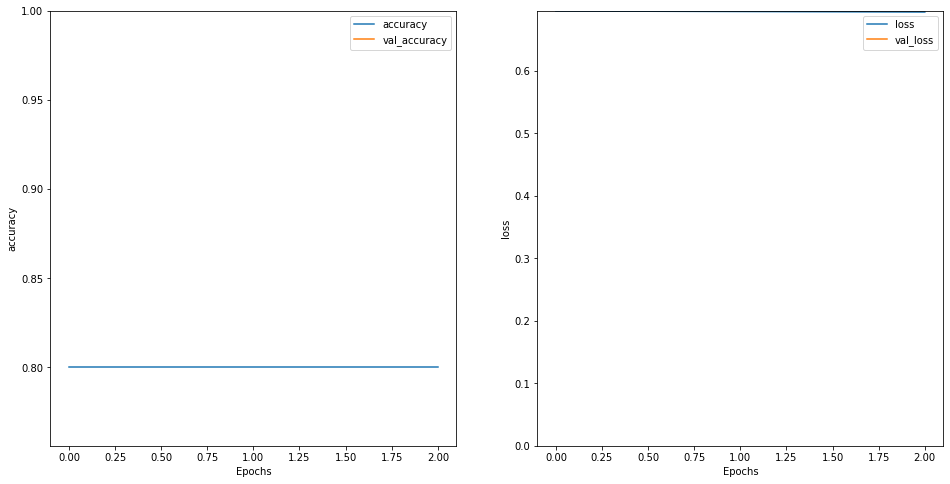

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.00524113]]
